<a href="https://colab.research.google.com/github/ymuto0302/base1_2021/blob/main/opendata2_corona_barplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# オープンデータの活用：新型コロナウイルス陽性者データ(1)
東京都，神奈川県，大阪府，福岡県等，多くの自治体が新型コロナウイルス(COVID-19)に関するデータをオープンデータとして公開している。

### 福岡県が提供するデータ
「福岡県オープンデータサイト」
https://www.open-governmentdata.org/fukuoka-pref/
にて各種データが提供されている。

このサイトにおいて，陽性者発表情報は

https://ckan.open-governmentdata.org/dataset/401000_pref_fukuoka_covid19_patients

に置かれている。ここからデータをダウンロードし，fukuoka_covid19_patients.csv へファイル名変更し，以下で用いる。

fukuoka_covid19_patients.csv の冒頭は以下のとおり：

```
No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,居住地,年代,性別,感染経路不明,濃厚接触者,海外渡航歴有
1,400009,福岡県,,2020/02/20,木,,福岡市中央区,60代,男性,1,,
2,400009,福岡県,,2020/02/20,木,,福岡市中央区,60代,女性,,1,
3,400009,福岡県,,2020/03/01,日,,北九州市小倉南区,60代,男性,1,,
4,400009,福岡県,,2020/03/17,火,,福岡市南区,30代,女性,,,1
5,400009,福岡県,,2020/03/19,木,,宗像市,30代,女性,,,1
6,400009,福岡県,,2020/03/23,月,,北九州市小倉北区,40代,男性,1,,
7,400009,福岡県,,2020/03/24,火,,福岡市早良区,40代,男性,1,,
8,400009,福岡県,,2020/03/24,火,,飯塚市,30代,男性,1,,
9,400009,福岡県,,2020/03/24,火,,飯塚市,30代,女性,,1,
```

### Google Drive のマウント

In [1]:
# Google Drive のマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CSVファイルからのデータの読み込み
福岡県の新型コロナのデータは UTF-8 で記述されている。
また，シンプルなヘッダゆえ，encoding 以外のオプションは不要である。

In [2]:
import pandas as pd

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/fukuoka_covid19_patients.csv", encoding="utf-8")

読み込んだデータを確認すると，２万件に迫るデータが含まれることが分かる。

In [3]:
df

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,居住地,年代,性別,感染経路不明,濃厚接触者,海外渡航歴有
0,1,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,男性,1.0,NaN,NaN
1,2,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,女性,NaN,1.0,NaN
2,3,400009.0,福岡県,NaN,2020/03/01,日,NaN,北九州市小倉南区,60代,男性,1.0,NaN,NaN
3,4,400009.0,福岡県,NaN,2020/03/17,火,NaN,福岡市南区,30代,女性,NaN,NaN,1.0
4,5,400009.0,福岡県,NaN,2020/03/19,木,NaN,宗像市,30代,女性,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19775,19776,400009.0,福岡県,NaN,2021/04/14,水,NaN,久留米市,60代,女性,NaN,1.0,NaN
19776,19777,400009.0,福岡県,NaN,2021/04/14,水,NaN,久留米市,20代,男性,1.0,NaN,NaN
19777,19778,400009.0,福岡県,NaN,2021/04/14,水,NaN,久留米市,20代,男性,1.0,NaN,NaN
19778,19779,400009.0,福岡県,NaN,2021/04/14,水,NaN,久留米市,40代,女性,1.0,NaN,NaN


なお，データフレーム df の冒頭のみ（５行分）を表示したい場合，head() メソッドを用いる。

In [4]:
df.head()

,No,全国地方公共団体コード,都道府県名,市区町村名,公表_年月日,曜日,発症_年月日,居住地,年代,性別,感染経路不明,濃厚接触者,海外渡航歴有
0,1,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,男性,1.0,NaN,NaN
1,2,400009.0,福岡県,NaN,2020/02/20,木,NaN,福岡市中央区,60代,女性,NaN,1.0,NaN
2,3,400009.0,福岡県,NaN,2020/03/01,日,NaN,北九州市小倉南区,60代,男性,1.0,NaN,NaN
3,4,400009.0,福岡県,NaN,2020/03/17,火,NaN,福岡市南区,30代,女性,NaN,NaN,1.0
4,5,400009.0,福岡県,NaN,2020/03/19,木,NaN,宗像市,30代,女性,NaN,NaN,1.0


### 必要なデータ項目の選別
公表年月日，居住地，年代，性別を取り出すこととする。

ここで「居住地，年代，性別」の詳細は今回，用いない → 次回の授業で用いる。

**「絞り込むデータ項目」の指定にあたり，loc() メソッドを用いる。
loc() メソッドでは列名に列名を指定する。**

In [5]:
# リリース日（＝公表日），居住地，年代，性別のみを取り出す
df = df.loc[:, ["公表_年月日", "居住地", "年代", "性別"]]
df.head(10) # 結果確認のため，先頭の10行のみ表示

,公表_年月日,居住地,年代,性別
0,2020/02/20,福岡市中央区,60代,男性
1,2020/02/20,福岡市中央区,60代,女性
2,2020/03/01,北九州市小倉南区,60代,男性
3,2020/03/17,福岡市南区,30代,女性
4,2020/03/19,宗像市,30代,女性
5,2020/03/23,北九州市小倉北区,40代,男性
6,2020/03/24,福岡市早良区,40代,男性
7,2020/03/24,飯塚市,30代,男性
8,2020/03/24,飯塚市,30代,女性
9,2020/03/26,福岡市東区,50代,男性


ここで，**2020年2月20日や 3月24日に複数名（２名および３名）の陽性者が確認されている**点に注意する。

### 公表年月日毎の陽性者数をカウントするため，「カウント」列を作る
本課題では，「各月日の陽性者数の可視化」を目的とする。

上記のとおり，同一日に複数の陽性者が記録されており，これらをグループ化することで陽性者数を集計するため「カウント」列を作る。

In [6]:
# リリース日および年代でグループ化して，"患者数[6月1日]=3人" のような構造を作りたい
# 後ほど可視化（グラフ化）する際に利用するため，個々の患者に 1 を割り振る
df["カウント"] = 1
df.head() # 結果確認のため，先頭の５行のみ表示

,公表_年月日,居住地,年代,性別,カウント
0,2020/02/20,福岡市中央区,60代,男性,1
1,2020/02/20,福岡市中央区,60代,女性,1
2,2020/03/01,北九州市小倉南区,60代,男性,1
3,2020/03/17,福岡市南区,30代,女性,1
4,2020/03/19,宗像市,30代,女性,1


### グルーピング機能を用いて「公表年月日」でデータをまとめる
groupby() を用いてグルーピングを行う。

- groupby(["公表_年月日]) : 「公表_年月日」をキーとして，グルーピングを行う
- count() : グルーピングされた項目の数を求める

In [7]:
# 公表年月日をキーとしてグルーピング
df_count = df.groupby(["公表_年月日"]).count().reset_index()
df_count.head(10) # 結果確認のため，先頭の５行のみ表示

,公表_年月日,居住地,年代,性別,カウント
0,2020/02/20,2,2,2,2
1,2020/03/01,1,1,1,1
2,2020/03/17,1,1,1,1
3,2020/03/19,1,1,1,1
4,2020/03/23,1,1,1,1
5,2020/03/24,3,3,3,3
6,2020/03/26,3,3,3,3
7,2020/03/27,4,4,4,4
8,2020/03/28,6,6,6,6
9,2020/03/29,4,4,4,4


上記の結果を見ると，「カウント」列に「2月20日は２件」「3月24日に３件」という具合で，各日の陽性者数が得られている。
（他の「居住地」，「年代」等にも同じ数値が示されているが，これは必然である。ここでは気にしないことにしよう。）

### 公表年月日をインデックス列に指定する
陽性者数の可視化において，グラフの横軸を自動的に設定するため，公表年月日をインデックス列とする。

In [8]:
# 公表年月日をインデックス列に指定
df_count = df_count.set_index("公表_年月日")
df_count.head() # 結果確認のため，先頭の５行のみ表示

,居住地,年代,性別,カウント
公表_年月日,,,,
2020/02/20,2,2,2,2
2020/03/01,1,1,1,1
2020/03/17,1,1,1,1
2020/03/19,1,1,1,1
2020/03/23,1,1,1,1


### インデックス列の値を datetime 型へ変換
これも Pandas がデータを扱いやすいように！という処理である。

In [9]:
# インデックス列の値を datetime フォーマットへ変換
df_count.index = pd.to_datetime(df_count.index, format="%Y/%m/%d")
df_count.head() # 結果確認のため，先頭の５行のみ表示

,居住地,年代,性別,カウント
公表_年月日,,,,
2020-02-20,2,2,2,2
2020-03-01,1,1,1,1
2020-03-17,1,1,1,1
2020-03-19,1,1,1,1
2020-03-23,1,1,1,1


### matplotlib のため，各列のラベルの設定
matplotlib は（デフォルトでは）日本語文字列を使用できないため，列名前「居住地，年代，性別」をアルファベット表記へ書き換える。

また，インデックス列「公表_年月日」も "Date" へ置き換える。

(注) 後程，用いる Plotly では日本語を扱えるため，ここでは df_count をコピーした上で操作する。

In [10]:
# 各列のラベルおよびインデックス列名をアルファベット表記へ変更
df_count_en = df_count.copy()
df_count_en.columns = ["address", "age", "sex", "count"] # 各列の名前を変更
df_count_en.index.name = "Date" # インデックス列の名前を変更
df_count_en.head() # 結果確認のため，先頭の５行のみ表示

,address,age,sex,count
Date,,,,
2020-02-20,2,2,2,2
2020-03-01,1,1,1,1
2020-03-17,1,1,1,1
2020-03-19,1,1,1,1
2020-03-23,1,1,1,1


### Pandas のプロット機能を用いた可視化


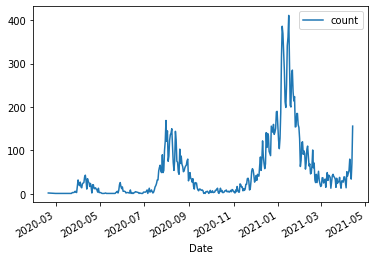

In [11]:
df_count_en.plot(y=df_count_en.columns[3])

## 以上をまとめたコード
ここではデータフレーム（変数 df や df_count）を表示していない。

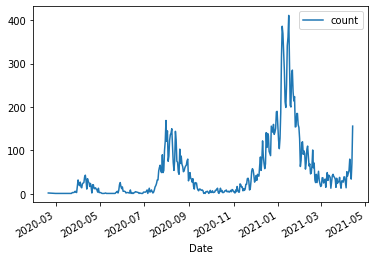

In [13]:
'''
新型コロナウイルス感染症に関するデータ【福岡県】の利用
'''
import pandas as pd

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/fukuoka_covid19_patients.csv", encoding="utf-8")

# リリース日（＝公表日），居住地，年代，性別のみを取り出す
df = df.loc[:, ["公表_年月日", "居住地", "年代", "性別"]]

# リリース日および年代でグループ化して，"患者数[6月1日]=3人" のような構造を作りたい
# 後ほど可視化（グラフ化）する際に利用するため，個々の患者に 1 を割り振る
df["カウント"] = 1

# 公表年月日をキーとしてグルーピング
df_count = df.groupby(["公表_年月日"]).count().reset_index()

# 公表年月日をインデックス列に指定
df_count = df_count.set_index("公表_年月日")

# インデックス列の値を datetime フォーマットへ変換
df_count.index = pd.to_datetime(df_count.index, format="%Y/%m/%d")

# 各列のラベルおよびインデックス列名をアルファベット表記へ変更
df_count_en = df_count.copy()
df_count_en.columns = ["address", "age", "sex", "count"] # 各列の名前を変更
df_count_en.index.name = "Date" # インデックス列の名前を変更

# 可視化
df_count_en.plot(y=df_count_en.columns[3])

## リッチな可視化
matplotlib は最小限の機能しか提供しない。（と言っても，それなりに充実している）

以下では Plotly Express を用いて，「リッチな可視化」を実現しよう。

Plotly Express で何ができるか？は下記のサイトをチェックしてください。

https://qiita.com/hanon/items/d8cbe25aa8f3a9347b0b

(注意) Google Colab で Plotly Express を利用する場合，**毎回**，パッケージをインストールする必要がある。

In [14]:
# 可視化の準備：次行の "!pip ・・・・" は PlotlyExpress をインストールする手順
!pip install plotly_express

In [16]:
# 可視化：棒グラフを描く
import plotly_express as px
fig = px.bar(df_count, x=df_count.index, y="カウント",
             title="新型コロナウイルス感染症に関するデータ【福岡県】：陽性患者属性")
fig.show()

## 以上をまとめたコード


In [18]:
'''
新型コロナウイルス感染症に関するデータ【福岡県】の利用
'''
import pandas as pd

# CSV ファイルからデータ読み込み
df = pd.read_csv("/content/drive/My Drive/BASE/OpenData/fukuoka_covid19_patients.csv", encoding="utf-8")

# リリース日（＝公表日），居住地，年代，性別のみを取り出す
df = df.loc[:, ["公表_年月日", "居住地", "年代", "性別"]]

# リリース日および年代でグループ化して，"患者数[6月1日]=3人" のような構造を作りたい
# 後ほど可視化（グラフ化）する際に利用するため，個々の患者に 1 を割り振る
df["カウント"] = 1

# 公表年月日をキーとしてグルーピング
df_count = df.groupby(["公表_年月日"]).count().reset_index()

# 公表年月日をインデックス列に指定
df_count = df_count.set_index("公表_年月日")

# インデックス列の値を datetime フォーマットへ変換
df_count.index = pd.to_datetime(df_count.index, format="%Y/%m/%d")

# 可視化：棒グラフを描く
import plotly_express as px
fig = px.bar(df_count, x=df_count.index, y="カウント",
             title="新型コロナウイルス感染症に関するデータ【福岡県】：陽性患者属性")
fig.show()